# # 📝 Amazon Product Review Sentiment Analysis

This project uses Natural Language Processing (NLP) and Logistic Regression to classify Amazon product reviews as **Positive**, **Neutral**, or **Negative**.

---

## 📂 Dataset
- Source: [Kaggle - Amazon Product Reviews](https://www.kaggle.com/datasets)
- Size: ~14,000 reviews with ratings
- Features used: `reviews.text`, `reviews.rating`

---

## 📌 Project Steps

1. **Data Loading & Cleaning**
   - Removed nulls, kept only review text and rating
   - Converted ratings to numeric

2. **Sentiment Labeling**
   - Rating ≥ 4 → Positive  
   - Rating ≤ 2 → Negative  
   - Rating == 3 → Neutral

3. **Text Preprocessing**
   - Lowercased text, removed punctuation and stopwords

4. **TF-IDF Vectorization**
   - Converted cleaned text into numerical vectors

5. **Model Training**
   - Trained a Logistic Regression classifier
   - Evaluated using Accuracy and Classification Report

6. **Evaluation**
   - Accuracy: ~94% (on full dataset)
   - Precision, recall, f1-score metrics reported

7. **Visualization**
   - Sentiment distribution plots
   - WordClouds of most common words

---

## 🔮 Optional Model Extensions
You can try additional models for comparison:
- `Naive Bayes` (e.g. `MultinomialNB`)
- `SVM` (e.g. `LinearSVC`)
- `RandomForestClassifier`

---

## 📁 Files
- `amazon_sentiment_analysis.ipynb`: Main Colab notebook
- `balanced_sentiment_predictions.csv`: Labeled predictions
- `README.md`: Project documentation

---

## ✅ Conclusion
This project demonstrates a complete NLP pipeline for sentiment classification using Amazon reviews. It highlights the importance of preprocessing, model selection, and evaluation in text classification tasks.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [2]:
!pip install textblob wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#Loading the dataset

In [3]:
# Load the dataset and inspect
df = pd.read_csv("1429_1.csv", engine='python', on_bad_lines='skip')

# OPTIONAL: Check column names (for exploration only)
df.columns.tolist()

# View first 5 rows
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


# Cleaning the dataset

In [4]:
df = df[['reviews.text', 'reviews.rating']].dropna()
df.columns = ['review', 'rating']
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])

# Create sentiment label from rating

In [5]:
df['label'] = df['rating'].apply(
    lambda x: 'Positive' if x >= 4 else ('Negative' if x <= 2 else 'Neutral')
)

# Label the Sentiment

In [6]:
def label_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating <= 2:
        return "Negative"
    else:
        return "Neutral"

df['label'] = df['rating'].apply(label_sentiment)

# Adding Synthetic Negative Reviews to Improve Model Accuracy


In [7]:
# Add synthetic short negative examples to help model understand "broken"/"damaged"
extra_negatives = [
    "The table is broken.",
    "The item arrived damaged.",
    "It was cracked.",
    "Doesn't work.",
    "Completely useless.",
    "Broken and not usable.",
    "The product stopped working.",
    "It’s defective."
]

extra_df = pd.DataFrame({'review': extra_negatives, 'label': ['Negative'] * len(extra_negatives)})

# Clean text function (add this if you haven’t defined it yet)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text_nltk(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Clean both main and extra data
df['clean_review'] = df['review'].apply(clean_text_nltk)
extra_df['clean_review'] = extra_df['review'].apply(clean_text_nltk)

# Combine both datasets
df = pd.concat([df, extra_df], ignore_index=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# View Sample Reviews

In [8]:
# View a few positive reviews
df[df['label'] == 'Positive'].head(3)

# View a few negative reviews
df[df['label'] == 'Negative'].head(3)

,review,rating,label,clean_review
117,Didn't have some of the features I was looking...,2.0,Negative,didnt features looking returned next day may g...
126,i Bought this around black friday for $60 hopi...,1.0,Negative,bought around black friday 60 hoping would awe...
169,I bought this tablet for my 4 year old daughte...,1.0,Negative,bought tablet 4 year old daughter many adverti...


# Clean the Review Text

In [10]:
import string

# Minimal stopwords list (you can expand it)
stop_words = set([
    'a', 'an', 'the', 'and', 'or', 'is', 'it', 'this', 'that', 'to', 'for', 'with',
    'of', 'on', 'was', 'in', 'as', 'by', 'are', 'at', 'be', 'have', 'has', 'i'
])

def clean_text_simple(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(clean_text_simple)
df.head()

,review,rating,label,clean_review
0,This product so far has not disappointed. My c...,5.0,Positive,product so far not disappointed my children lo...
1,great for beginner or experienced person. Boug...,5.0,Positive,great beginner experienced person bought gift ...
2,Inexpensive tablet for him to use and learn on...,5.0,Positive,inexpensive tablet him use learn step up from ...
3,I've had my Fire HD 8 two weeks now and I love...,4.0,Positive,ive had my fire hd 8 two weeks now love tablet...
4,I bought this for my grand daughter when she c...,5.0,Positive,bought my grand daughter when she comes over v...


# Balance the Dataset

In [11]:
# Undersample positive class
positive = df[df['label'] == 'Positive'].sample(500, random_state=42)
negative = df[df['label'] == 'Negative']
neutral = df[df['label'] == 'Neutral']

# Combine into one balanced DataFrame
balanced_df = pd.concat([positive, negative, neutral])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

# Vectorize the Cleaned Text (TF-IDF)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X = vectorizer.fit_transform(balanced_df['clean_review'])  # Input features
y = balanced_df['label']  # Target

# Split into Train/Test Sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SVM Model

In [14]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6280788177339901

Classification Report:
               precision    recall  f1-score   support

    Negative       0.55      0.55      0.55        92
     Neutral       0.63      0.71      0.67       195
    Positive       0.70      0.55      0.62       119

    accuracy                           0.63       406
   macro avg       0.63      0.61      0.61       406
weighted avg       0.63      0.63      0.63       406



# Train the Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Make Predictions on the Entire Balanced Dataset

In [16]:
balanced_df['prediction'] = model.predict(vectorizer.transform(balanced_df['clean_review']))

# Evaluate the Model

In [17]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5862068965517241

Classification Report:
               precision    recall  f1-score   support

    Negative       0.63      0.42      0.51        92
     Neutral       0.55      0.81      0.66       195
    Positive       0.69      0.35      0.47       119

    accuracy                           0.59       406
   macro avg       0.62      0.53      0.54       406
weighted avg       0.61      0.59      0.57       406



# Visualize Sentiment Distribution

/tmp/ipython-input-18-3039871173.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_df, x='prediction', palette='Set2')


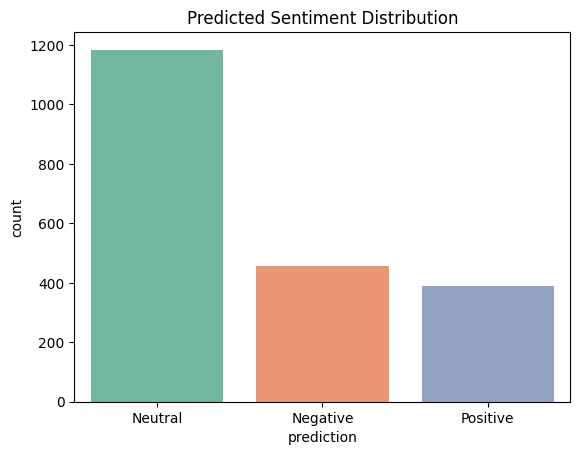

In [18]:
sns.countplot(data=balanced_df, x='prediction', palette='Set2')
plt.title("Predicted Sentiment Distribution")
plt.show()

# WordCloud Visualization

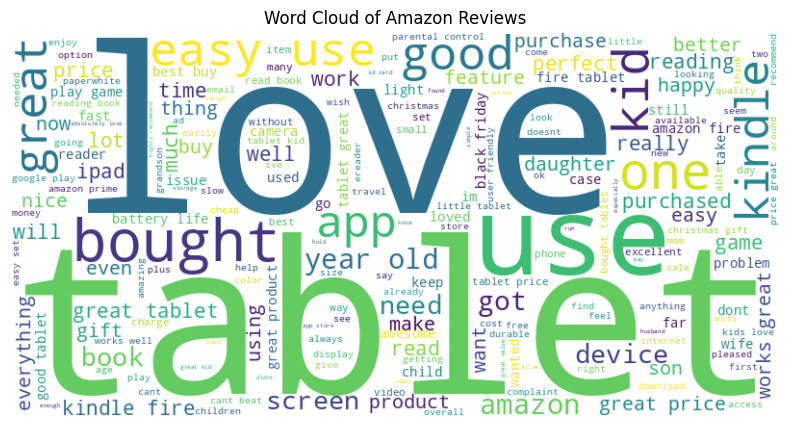

In [19]:
from wordcloud import WordCloud

# Combine all cleaned reviews into a single string
text = " ".join(df['clean_review'])

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Amazon Reviews")
plt.show()

# Export Results to CSV

In [23]:
balanced_df['prediction'] = model.predict(vectorizer.transform(balanced_df['clean_review']))
balanced_df.to_csv("balanced_sentiment_predictions.csv", index=False)

# Save the Trained Model and Vectorizer

In [24]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(model, 'model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']